In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from sklearn.metrics.pairwise import rbf_kernel

In [4]:
def stybtang(x):
    return .5*(x**4-16*x**2+5*x)
def stybtangDeriv(x):
    return .5*(4*x**3-32*x+5)

def add_noise(x,sigma=2.5):
    return x + np.random.normal(scale=sigma,size=x.shape)

In [12]:
def train_and_predict(xtrain,ytrain,xtest,kernel=None):
    model = KernelRidgeRegression(k=kernel)
    model.add_data(xtrain,ytrain)
    model.train()

    yhat = model.forward(xtest)
    
    return yhat


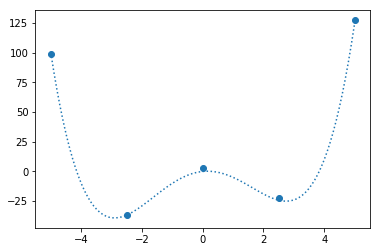

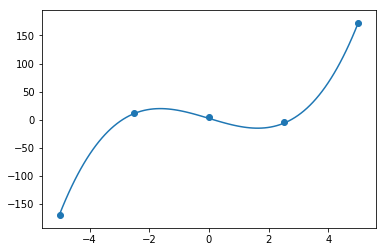

In [5]:
xfull = np.linspace(-5,5,100)
yfull = stybtang(xfull)

x = np.linspace(-5,5,5)
y = add_noise(stybtang(x))

plt.figure
plt.scatter(x,y)
plt.plot(xfull,yfull,':')
plt.figure()
plt.plot(xfull,stybtangDeriv(xfull))
plt.scatter(x,add_noise(stybtangDeriv(x)))

# Kernel Object

In [8]:
class KernelRidgeRegression:
    def __init__(self,k=None,lamb=1):
        self.k = k if k is not None else lambda x,y : x.dot(y.T)
        
        self.lamb = lamb

    def add_data(self,x,y):
        self.x = x
        self.y = y
        self.n = x.shape[0]
        self.d = x.shape[1] if x.ndim > 1 else 1
    
    def train(self):
        x = self.x.reshape(self.n,self.d)
        K = self.k(x,x)
        self.alpha = self.y.T.dot(np.linalg.inv(K+self.lamb*np.eye(self.n)))
        
    def forward(self,x):
        # Assumes x is m x d
        x = x.reshape(-1,self.d)
        x = self.k(self.x.reshape(self.n,self.d),x.reshape(-1,self.d))
        return self.alpha.dot(x)
        
        
        
        

# Linear

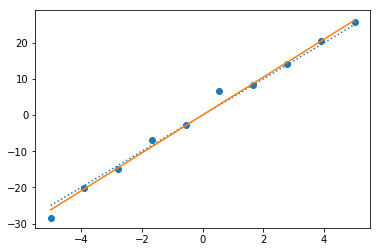

In [9]:
m = 5
x = np.linspace(-5,5,10)
y = add_noise(m*x)

xfull = np.linspace(-5,5,100)

model = KernelRidgeRegression()
model.add_data(x,y)
model.train()
yhat = model.forward(xfull)

plt.figure()
plt.scatter(x,y)
plt.plot(xfull,m*xfull,':')
plt.plot(xfull,yhat)

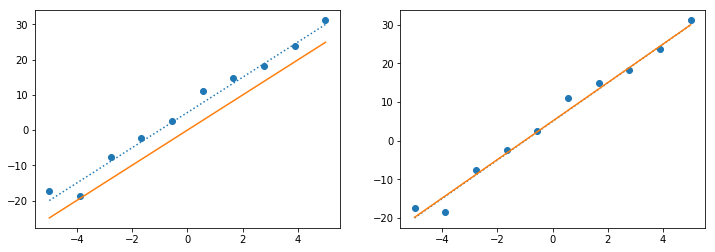

In [10]:
m,b = (5,5)
x = np.linspace(-5,5,10)
y = add_noise(m*x+b)

xfull = np.linspace(-5,5,100)

model = KernelRidgeRegression()
model.add_data(x,y)
model.train()
yhat = model.forward(xfull)

plt.figure(figsize =(12,4))
plt.subplot(121)
plt.scatter(x,y)
plt.plot(xfull,m*xfull+b,':')
plt.plot(xfull,yhat)

kbias = lambda x,y: x.dot(y.T) + 1
model = KernelRidgeRegression(k=kbias)
model.add_data(x,y)
model.train()
yhat = model.forward(xfull)
plt.subplot(122)
plt.scatter(x,y)
plt.plot(xfull,m*xfull+b,':')
plt.plot(xfull,yhat)


Text(0.5, 1.0, 'Gaussian')

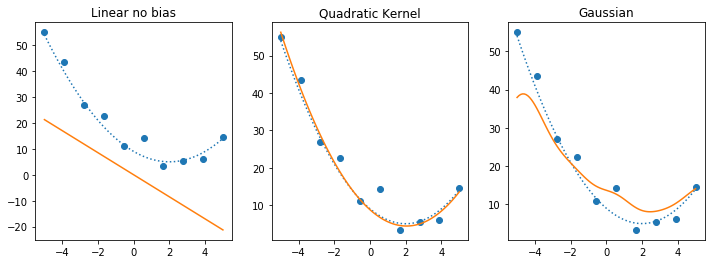

In [13]:
m,b = (2,5)
source = lambda x: np.power(x-m,2)+b

x = np.linspace(-5,5,10)
y = add_noise(source(x))

xfull = np.linspace(-5,5,100)

yhat = train_and_predict(x,y,xfull)

plt.figure(figsize =(12,4))
plt.subplot(131)
plt.scatter(x,y)
plt.plot(xfull,source(xfull),':')
plt.plot(xfull,yhat)
plt.title('Linear no bias')

kbias = lambda x,y: np.power(x.dot(y.T) + 1,2)

yhat = train_and_predict(x,y,xfull,kbias)
plt.subplot(132)
plt.scatter(x,y)
plt.plot(xfull,source(xfull),':')
plt.plot(xfull,yhat)
plt.title('Quadratic Kernel')



kgauss = lambda x,y: rbf_kernel(x,y,1/2)+1#np.exp(-np.power(x-y,2)/2)+1

yhat = train_and_predict(x,y,xfull,kgauss)
plt.subplot(133)
plt.scatter(x,y)
plt.plot(xfull,source(xfull),':')
plt.plot(xfull,yhat)
plt.title('Gaussian')


# D=2

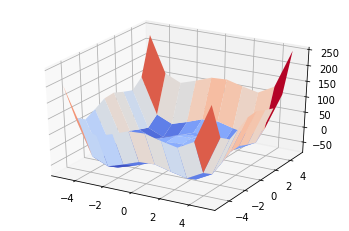

In [15]:
def styb_tang(x):
    # Assumes x is dimension n x 2
    y = np.power(x,4) - 16*np.power(x,2) + 5*x
    return .5*np.sum(y,axis=1)
    
x1 = np.linspace(-5,5,10)
x2 = np.linspace(-5,5,10)



X1,X2 = np.meshgrid(x1,x2)
m,n = X1.shape

X = np.hstack([X1.reshape(-1,1),X2.reshape(-1,1)])

Z = styb_tang(X).reshape(m,n)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X1,X2,Z,cmap=cm.coolwarm)

Text(0.5, 0.92, 'Linear Regression')

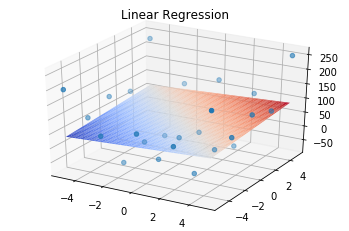

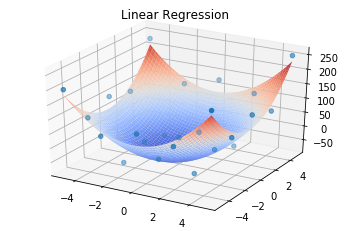

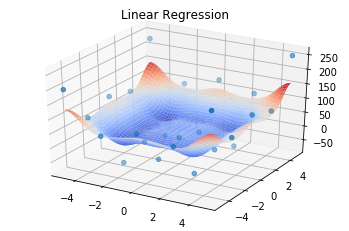

In [16]:
# Training Data
x1 = np.linspace(-5,5,5)

X1,X2 = np.meshgrid(x1,x1)

X = np.hstack([X1.reshape(-1,1),X2.reshape(-1,1)])
Y = add_noise(styb_tang(X))

# Test Data
xfull = np.linspace(-5,5,100)
X1f,X2f = np.meshgrid(xfull,xfull)
Xfull = np.hstack([X1f.reshape(-1,1), X2f.reshape(-1,1)])
Yfull = styb_tang(Xfull).reshape(X1f.shape)

linear_kernel = lambda x,y : x.dot(y.T) + 1
yhat_lin = train_and_predict(X,Y,Xfull,kernel=linear_kernel).reshape(X1f.shape)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.scatter3D(X1,X2,Y.reshape(X1.shape),cmap=cm.coolwarm)
#surf = ax.plot_wireframe(X1f,X2f,Yfull,cmap=cm.coolwarm)
surf = ax.plot_surface(X1f,X2f,yhat_lin,cmap=cm.coolwarm)
ax.set_title('Linear Regression')

quad_kernel = lambda x,y : np.power(x.dot(y.T) + 1,2)
yhat_quad = train_and_predict(X,Y,Xfull,kernel=quad_kernel).reshape(X1f.shape)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.scatter3D(X1,X2,Y.reshape(X1.shape),cmap=cm.coolwarm)
#surf = ax.plot_wireframe(X1f,X2f,Yfull,cmap=cm.coolwarm)
surf = ax.plot_surface(X1f,X2f,yhat_quad,cmap=cm.coolwarm)
ax.set_title('Linear Regression')

gaussian_kernel = lambda x,y : rbf_kernel(x,y,1/2)+1
yhat_gauss = train_and_predict(X,Y,Xfull,kernel=gaussian_kernel).reshape(X1f.shape)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.scatter3D(X1,X2,Y.reshape(X1.shape),cmap=cm.coolwarm)
#surf = ax.plot_wireframe(X1f,X2f,Yfull,cmap=cm.coolwarm)
surf = ax.plot_surface(X1f,X2f,yhat_gauss,cmap=cm.coolwarm)
ax.set_title('Linear Regression')



# With Derivatives

In [200]:
class DerivKernelRidgeRegression:
    def __init__(self,k=None,dk=None,lamb=1,bias=False):
        self.k = k if k is not None else lambda x,y : x.dot(y.T)
        self.dk = dk
        
        self.lamb = lamb
        self.bias = bias

    def add_data(self,x,y,dy=None):
        self.x = x
        self.y = y
        self.dy = dy
        self.n = x.shape[0]
        self.d = x.shape[1] if x.ndim > 1 else 1
    
    def train(self):
        x = self.x.reshape(self.n,self.d)
        K = self.k(x,x)
        
        if self.dk is None or self.dy is None:
            # Treats it as standard kernal ridge regression
            self.alpha = self.y.T.dot(np.linalg.inv(K+self.lamb*np.eye(self.n)))
        else:
            dK = self.dk(x,x)
            I = np.eye(self.n)
            if self.bias:
                K = np.hstack([np.ones((K.shape[0],1)),K])
                dK = np.hstack([np.zeros((dK.shape[0],1)),dK])
                I = np.eye(self.n+1)
                I[0,0] = 0
            
            A = np.vstack([K,dK])
            b = np.append(self.y,self.dy)
            self.alpha = np.linalg.inv(A.T.dot(A) + self.lamb*I).dot(A.T).dot(b)
        
    def forward(self,x):
        # Assumes x is m x d
        x = x.reshape(-1,self.d)
        x = self.k(self.x.reshape(self.n,self.d),x.reshape(-1,self.d))
        
        if self.bias:
            return self.alpha[1:].dot(x) + self.alpha[0]
        return self.alpha.dot(x)
        
def scale_vectors(M,v):
    # M: m,n matrix of scaling factors
    # v: n,d matrix. n vectors of dim d
    # or m,n,d vectors
    m,n = M.shape
    
    if v.ndim == 1:
        # scalars
        v = v.reshape(n,1).T
        return np.multiply(M,np.tile(v,[m,1]))
    
    d = v.shape[-1]
    M = np.tile(M[...,np.newaxis],[1,1,d])
    if v.ndim == 2:
        v = np.tile(v[np.newaxis,...],[m,1,1])
        
    return np.multiply(M,v).transpose(0,2,1).reshape(m*d,n)

def train_and_predict_derivs(xtrain,ytrain,xtest,dytrain=None,kernel=None,dk=None,bias=False):
    model = DerivKernelRidgeRegression(k=kernel,dk=dk,bias=bias)
    model.add_data(xtrain,ytrain,dytrain)
    model.train()

    yhat = model.forward(xtest)
    
    return yhat
        
        

In [201]:
a = np.arange(9).reshape(3,3)

print(scale_vectors(a,np.arange(3)))

print('------------')
b = np.arange(3).reshape(3,1)
b = np.tile(b,[1,2])

print(scale_vectors(a,b))
print('------------')
print(scale_vectors(a,bp))

[[ 0  1  4]
 [ 0  4 10]
 [ 0  7 16]]
------------
[[ 0  1  4]
 [ 0  1  4]
 [ 0  4 10]
 [ 0  4 10]
 [ 0  7 16]
 [ 0  7 16]]
------------
[[ 0  1  4]
 [ 0  1  4]
 [ 0  4 10]
 [ 0  4 10]
 [ 0  7 16]
 [ 0  7 16]]


Text(0.5, 1.0, 'Gaussian')

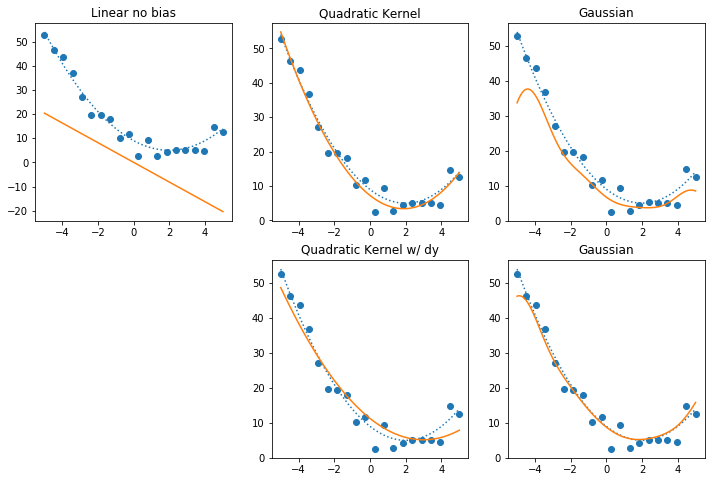

In [203]:
m,b = (2,5)
source = lambda x: np.power(x-m,2)+b

x = np.linspace(-5,5,20)
y = add_noise(source(x))
dy = add_noise(2*(x-m),sigma=1)

xfull = np.linspace(-5,5,100)

yhat = train_and_predict_derivs(x,y,xfull)

plt.figure(figsize =(12,8))
plt.subplot(231)
plt.scatter(x,y)
plt.plot(xfull,source(xfull),':')
plt.plot(xfull,yhat)
plt.title('Linear no bias')

quad_kernel = lambda x,y: np.power(x.dot(y.T) + 1,2)

def dquad_kernel(x,y):
    K = 2*quad_kernel(x,y)
    return scale_vectors(K,y)


yhat = train_and_predict_derivs(x,y,xfull,dytrain=dy,kernel=quad_kernel)
plt.subplot(232)
plt.scatter(x,y)
plt.plot(xfull,source(xfull),':')
plt.plot(xfull,yhat)
plt.title('Quadratic Kernel')

yhat = train_and_predict_derivs(x,y,xfull,dytrain=dy,kernel=quad_kernel,dk=dquad_kernel)
plt.subplot(235)
plt.scatter(x,y)
plt.plot(xfull,source(xfull),':')
plt.plot(xfull,yhat)
plt.title('Quadratic Kernel w/ dy')


kgauss = lambda x,y: rbf_kernel(x,y,1/2)#np.exp(-np.power(x-y,2)/2)+1

def dguass_kernel(u,v):
    # always assumes input is nxd
    K = -kgauss(u,v)
    
    if u.shape[-1] == 1:
        # 1D case
        derivs = u - v.T
        return np.multiply(K,derivs)
    m,d = u.shape
    n,d = v.shape
    u = np.tile(u[:,np.newaxis,:],[1,n,1])
    v = np.tile(v[np.newaxis,...],[m,1,1])
    return scale_vectors(K,u-v)


yhat = train_and_predict_derivs(x,y,xfull,kernel=kgauss)
plt.subplot(233)
plt.scatter(x,y)
plt.plot(xfull,source(xfull),':')
plt.plot(xfull,yhat)
plt.title('Gaussian')

yhat = train_and_predict_derivs(x,y,xfull,dytrain=dy,kernel=kgauss,dk=dguass_kernel,bias=True)
plt.subplot(236)
plt.scatter(x,y)
plt.plot(xfull,source(xfull),':')
plt.plot(xfull,yhat)
plt.title('Gaussian')


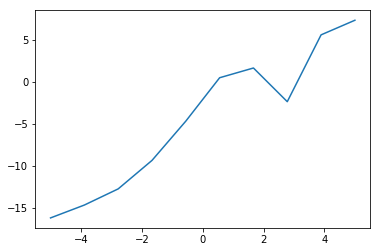

In [166]:
plt.plot(x,dy)

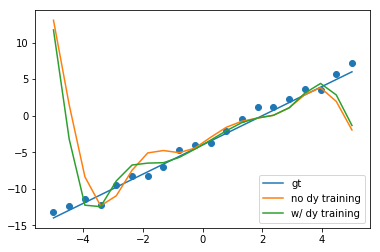

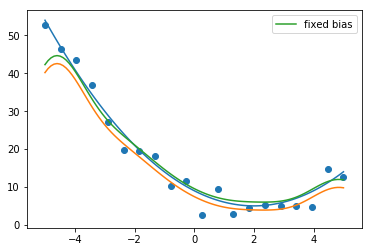

In [204]:
plt.figure()
plt.plot(x,2*(x-m),label='gt')
plt.scatter(x,dy)

model = DerivKernelRidgeRegression(k=kgauss,dk=dguass_kernel)
model.add_data(x,y)
model.train()

dyhat2 = dguass_kernel(x.reshape(-1,1),model.x.reshape(-1,1)).dot(model.alpha)
plt.plot(x,dyhat2,label='no dy training')


model = DerivKernelRidgeRegression(k=kgauss,dk=dguass_kernel)
model.add_data(x,y,dy)
model.train()

dyhat1 = dguass_kernel(x.reshape(-1,1),model.x.reshape(-1,1)).dot(model.alpha)
plt.plot(x,dyhat1,label='w/ dy training')




plt.legend(loc=0)
yhat = model.forward(xfull)


plt.figure()
plt.plot(xfull,source(xfull))
plt.plot(xfull,yhat)

plt.plot(xfull,yhat - (model.forward(x)-y).mean(),label='fixed bias')
plt.legend(loc=0)

plt.scatter(x,y)

In [219]:
def display_3d(ax,training,predictions,title=None):
    X1,X2,Y = training
    X1f,X2f,yhat = predictions
    
    surf = ax.scatter3D(X1,X2,Y,cmap=cm.coolwarm)
    #surf = ax.plot_wireframe(X1f,X2f,Yfull,cmap=cm.coolwarm)
    surf = ax.plot_surface(X1f,X2f,yhat,cmap=cm.coolwarm)
    if title is not None: 
        ax.set_title(title) 
def grad_styb_tang(x):
    # Assumes x is dimension n x 2
    y = 4*np.power(x,3) - 32*x + 5
    return .5*y
def mse(a,b):
    return np.power(a.reshape(-1)-b.reshape(-1),2).mean()

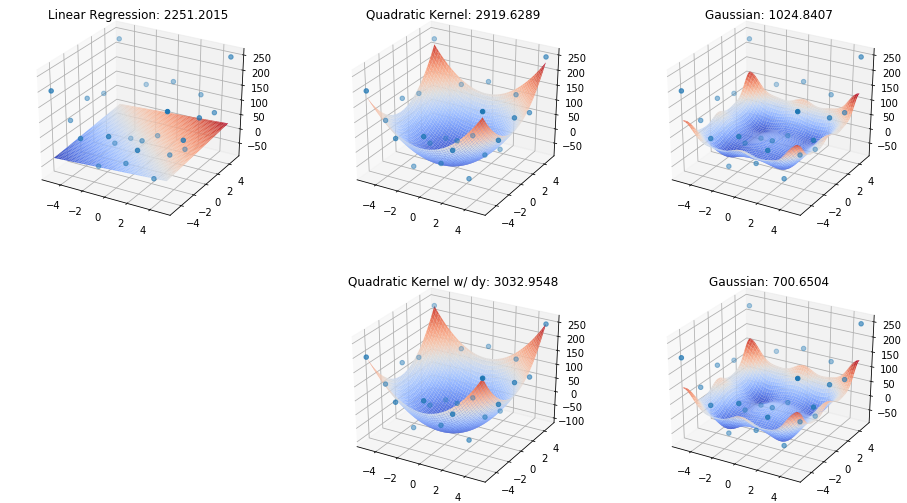

In [221]:
# Training Data
x1 = np.linspace(-5,5,5)

X1,X2 = np.meshgrid(x1,x1)

X = np.hstack([X1.reshape(-1,1),X2.reshape(-1,1)])
Y = add_noise(styb_tang(X))
DY = add_noise(grad_styb_tang(X))

training = (X1,X2,Y.reshape(X1.shape))

# Test Data
xfull = np.linspace(-5,5,100)
X1f,X2f = np.meshgrid(xfull,xfull)
Xfull = np.hstack([X1f.reshape(-1,1), X2f.reshape(-1,1)])
Yfull = styb_tang(Xfull).reshape(X1f.shape)

# Figure
fig = plt.figure(figsize =(16,9))

# Linear
yhat = train_and_predict_derivs(X,Y,Xfull).reshape(X1f.shape)

ax = fig.add_subplot(231,projection='3d')
display_3d(ax,training,(X1f,X2f,yhat),'Linear Regression: %.4f'% mse(yhat,Yfull))

# Quadratic
yhat = train_and_predict_derivs(X,Y,Xfull,dytrain=DY,kernel=quad_kernel).reshape(X1f.shape)

ax = fig.add_subplot(232,projection='3d')
display_3d(ax,training,(X1f,X2f,yhat),'Quadratic Kernel: %.4f'% mse(yhat,Yfull))

yhat = train_and_predict_derivs(X,Y,Xfull,dytrain=DY,kernel=quad_kernel,dk=dquad_kernel).reshape(X1f.shape)
ax = fig.add_subplot(235,projection='3d')
display_3d(ax,training,(X1f,X2f,yhat),'Quadratic Kernel w/ dy: %.4f'% mse(yhat,Yfull))


# Gaussian

yhat = train_and_predict_derivs(X,Y,Xfull,kernel=kgauss).reshape(X1f.shape)
ax = fig.add_subplot(233,projection='3d')
display_3d(ax,training,(X1f,X2f,yhat),'Gaussian: %.4f'% mse(yhat,Yfull))

yhat = train_and_predict_derivs(X,Y,Xfull,dytrain=DY,kernel=kgauss,dk=dguass_kernel).reshape(X1f.shape)
ax = fig.add_subplot(236,projection='3d')
display_3d(ax,training,(X1f,X2f,yhat),'Gaussian: %.4f'% mse(yhat,Yfull))


Text(0.5, 1.0, 'Evenly Spaced Points')

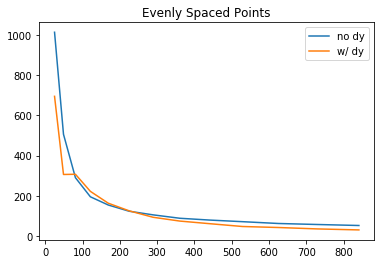

In [242]:
# Test Data
xfull = np.linspace(-5,5,100)
X1f,X2f = np.meshgrid(xfull,xfull)
Xfull = np.hstack([X1f.reshape(-1,1), X2f.reshape(-1,1)])
Yfull = styb_tang(Xfull).reshape(X1f.shape)

ks = np.arange(5,30,2)

normal_mses = np.zeros_like(ks)
dy_mses = np.zeros_like(ks)

display = False

for i,k in enumerate(ks):
    # Training Data
    x1 = np.linspace(-5,5,k)

    X1,X2 = np.meshgrid(x1,x1)

    X = np.hstack([X1.reshape(-1,1),X2.reshape(-1,1)])
    Y = add_noise(styb_tang(X))
    DY = add_noise(grad_styb_tang(X))

    training = (X1,X2,Y.reshape(X1.shape))

    # Figure
    if display:
        fig = plt.figure(figsize =(16,4))

    # Gaussian

    yhat = train_and_predict_derivs(X,Y,Xfull,kernel=kgauss).reshape(X1f.shape) 
    normal_mses[i] = mse(yhat,Yfull)

    if display:
        ax = fig.add_subplot(121,projection='3d')
        display_3d(ax,training,(X1f,X2f,yhat),'Gaussian[%i]: %.4f'% (k*k,normal_mses[i]))

    yhat = train_and_predict_derivs(X,Y,Xfull,dytrain=DY,kernel=kgauss,dk=dguass_kernel).reshape(X1f.shape)
    dy_mses[i] = mse(yhat,Yfull)
    if display:
        ax = fig.add_subplot(122,projection='3d')
        display_3d(ax,training,(X1f,X2f,yhat),'Gaussian + dy[%i]: %.4f'% (k*k,dy_mses[i]))
        
plt.figure()
plt.plot(ks**2,normal_mses,label='no dy')
plt.plot(ks**2,dy_mses,label='w/ dy')
plt.legend(loc=0)
plt.title('Evenly Spaced Points')

Text(0.5, 0, 'Num Training Points')

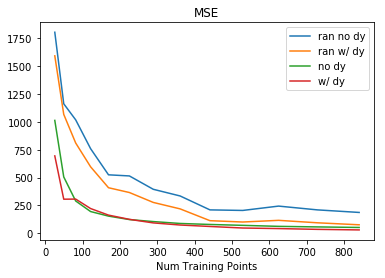

In [244]:
# Test Data
xfull = np.linspace(-5,5,100)
X1f,X2f = np.meshgrid(xfull,xfull)
Xfull = np.hstack([X1f.reshape(-1,1), X2f.reshape(-1,1)])
Yfull = styb_tang(Xfull).reshape(X1f.shape)

ran_ks = np.arange(5,30,2)**2

ran_normal_mses = np.zeros_like(ran_ks)
ran_dy_mses = np.zeros_like(ran_ks)

display = False

for i,k in enumerate(ran_ks):
    # Training Data
    X = np.random.uniform(-5,5,(k,2))

    Y = add_noise(styb_tang(X))
    DY = add_noise(grad_styb_tang(X))

    training = (X[:,0],X2[:,1],Y)

    # Figure
    if display:
        fig = plt.figure(figsize =(16,4))

    # Gaussian

    yhat = train_and_predict_derivs(X,Y,Xfull,kernel=kgauss).reshape(X1f.shape) 
    ran_normal_mses[i] = mse(yhat,Yfull)

    if display:
        ax = fig.add_subplot(121,projection='3d')
        display_3d(ax,training,(X1f,X2f,yhat),'Gaussian[%i]: %.4f'% (k*k,normal_mses[i]))

    yhat = train_and_predict_derivs(X,Y,Xfull,dytrain=DY,kernel=kgauss,dk=dguass_kernel).reshape(X1f.shape)
    ran_dy_mses[i] = mse(yhat,Yfull)
    if display:
        ax = fig.add_subplot(122,projection='3d')
        display_3d(ax,training,(X1f,X2f,yhat),'Gaussian + dy[%i]: %.4f'% (k*k,dy_mses[i]))
        
plt.figure()
plt.plot(ran_ks,ran_normal_mses,label='ran no dy')
plt.plot(ran_ks,ran_dy_mses,label='ran w/ dy')
plt.plot(ks**2,normal_mses,label='no dy')
plt.plot(ks**2,dy_mses,label='w/ dy')
plt.legend(loc=0)
plt.title('MSE')
plt.xlabel('Num Training Points')

In [153]:
tx


array([[-5. ],
       [-2.5],
       [ 0. ],
       [ 2.5],
       [ 5. ]])

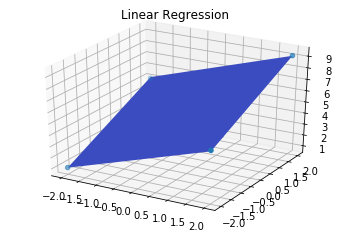

In [102]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.scatter3D(X1,X2,Y.reshape(X1.shape),cmap=cm.coolwarm)
#surf = ax.plot_wireframe(X1f,X2f,Yfull,cmap=cm.coolwarm)
surf = ax.plot_surface(X1,X2,yhat.T,cmap=cm.coolwarm)
ax.set_title('Linear Regression')
plt.show()

In [97]:
class KernelRidgeRegression:
    def __init__(self,k=None,lamb=1):
        self.k = k if k is not None else lambda x,y : x.dot(y)
        
        self.lamb = lamb

    def add_data(self,x,y):
        self.x = x
        self.y = y
        self.n = x.shape[0]
        self.d = x.shape[1] if x.ndim > 1 else 1
    
    def train(self):
        x = self.x.reshape(self.n,self.d)
        K = self.k(x,x.T)
        self.alpha = self.y.T.dot(np.linalg.inv(K+self.lamb*np.eye(self.n)))
        
    def forward(self,x):
        # Assumes x is m x d
        x = self.k(self.x,x.T)
        return self.alpha.dot(x)
        
        
        
        

In [98]:
K = model.k(model.x,model.x.T)

In [96]:
model.alpha

array([ 15.60243205, -13.32091088, -13.3271271 ,  16.1126153 ])

# Polynomial Degree Four Fit

In [30]:
def d4_x(x):
    X = x.reshape(-1,1)
    X = np.hstack([np.ones(X.shape),X,X**2,X**3,X**4])
    return X

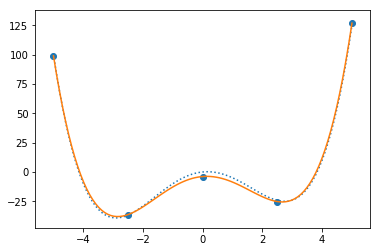

In [36]:
Xd4 = d4_x(x)
betad4 = np.linalg.inv(Xd4.T.dot(Xd4)).dot(Xd4.T.dot(y))
yhat = d4_x(xfull).dot(betad4)
plt.figure()
plt.plot(xfull,yfull,':')
plt.scatter(x,y)
plt.plot(xfull,yhat)

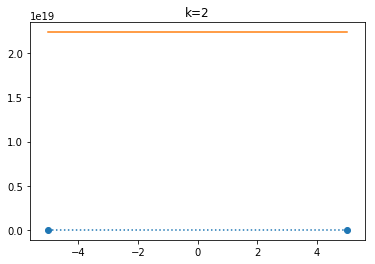

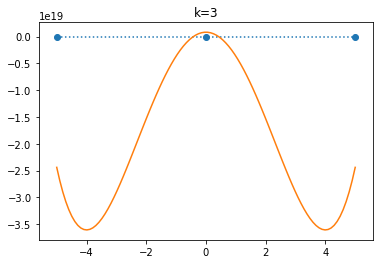

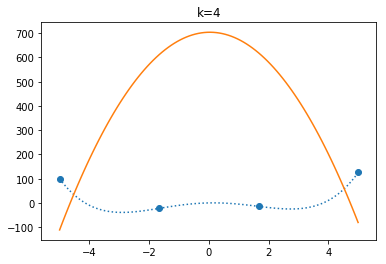

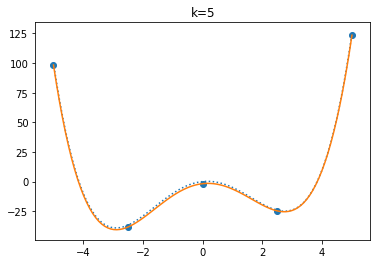

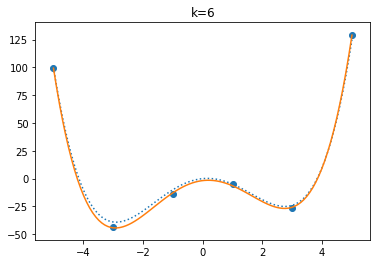

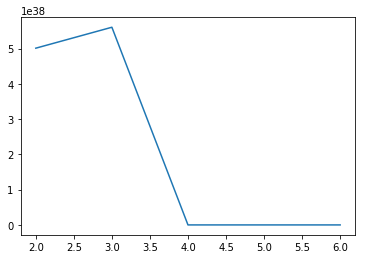

In [57]:

num_points = np.arange(2,7)
errors = np.zeros(num_points.shape)

for idx,k in enumerate(num_points):
    # Sample 
    x = np.linspace(-5,5,k)
    y = add_noise(stybtang(x))
    
    Xd4 = d4_x(x)
    betad4 = np.linalg.inv(Xd4.T.dot(Xd4)).dot(Xd4.T.dot(y))
    yhat = d4_x(xfull).dot(betad4)
    
    errors[idx] = np.mean(np.power(yhat-yfull,2))
    plt.figure()
    plt.plot(xfull,yfull,':')
    plt.scatter(x,y)
    plt.plot(xfull,yhat)
    plt.title('k='+str(k))
plt.figure()
plt.plot(num_points,errors)

# With Derivatives


In [53]:
def derivd4_x(x):
    X = x.reshape(-1,1)
    X1 = np.hstack([np.ones(X.shape),X,X**2,X**3,X**4])
    
    dX = np.hstack([np.zeros(X.shape),np.ones(X.shape),2*X,3*X**2,4*X**3])
    
    return np.vstack([X1,dX])

In [54]:
x = np.linspace(-5,5,5)

print(derivd4_x(x).shape)

(10, 5)


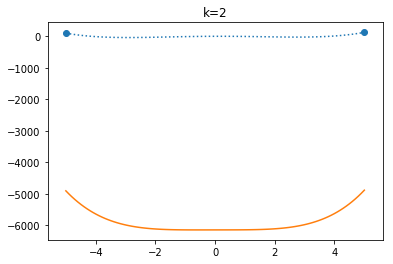

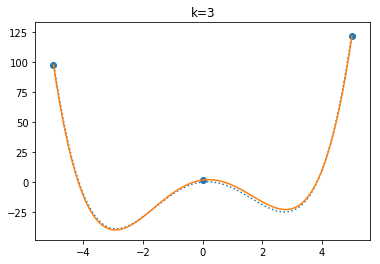

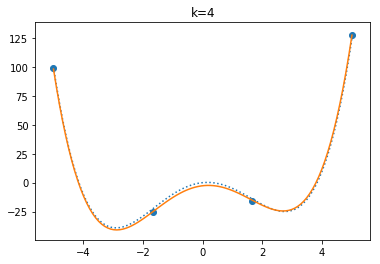

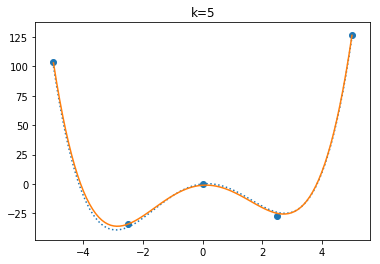

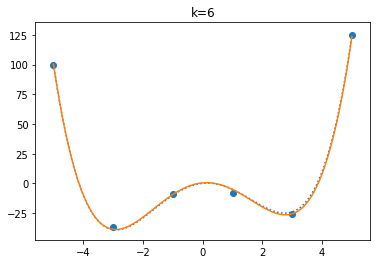

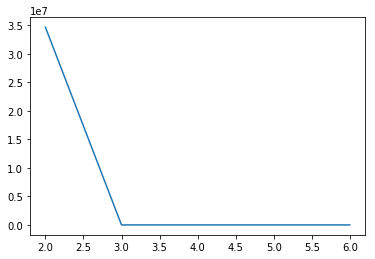

In [59]:
num_points = np.arange(2,7)
deriv_errors = np.zeros(num_points.shape)

for idx,k in enumerate(num_points):
    # Sample 
    x = np.linspace(-5,5,k)
    y = add_noise(np.append(stybtang(x),stybtangDeriv(x)))
    #dy = add_noise(stybtangDeriv(x))
    
    Xd4 = derivd4_x(x)
    betad4 = np.linalg.inv(Xd4.T.dot(Xd4)).dot(Xd4.T.dot(y))
    yhat = d4_x(xfull).dot(betad4)
    
    deriv_errors[idx] = np.mean(np.power(yhat-yfull,2))
    
    plt.figure()
    plt.plot(xfull,yfull,':')
    plt.scatter(x,y[:k])
    plt.plot(xfull,yhat)
    plt.title('k='+str(k))
plt.figure()
plt.plot(num_points,deriv_errors)

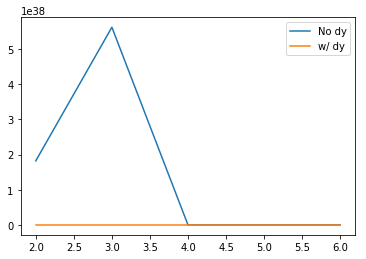

In [56]:
plt.figure()
plt.plot(num_points,errors,label='No dy')
plt.plot(num_points,deriv_errors,label='w/ dy')
plt.legend(loc=0)